# Chicago Crime Data exploration

In [12]:
# Import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

In [13]:
# Download the dataset
df = pd.read_csv('Crimes_-_2001_to_Present_20231022.csv')
# Shape
df.shape

(7917278, 22)

In [14]:
# First five rows
display(df.head())
# Columns names
display(df.columns)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

For the better observation columns and decide which columns I want to pick for further exploration, I divided this dataframe into two parts. By subsetting 'df1' with first half of columns, 'df2' with second half. 

In [15]:
# Divide dataframe into two parts

# df1 columns from 0 to 10
df1 = df.iloc[:,0:11]

# df2 columns from 11 to 22
df2 = df.iloc[:,11:]

display(df1.columns)
display(df2.columns)

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat'],
      dtype='object')

Index(['District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [16]:
display(df1.head())
display(df2.head())

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222


,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,1.0,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,25.0,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,17.0,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,22.0,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


I decided to remove columns: 'ID', 'Case Number', 'Block', 'IUCR', 'Description', 'Location Description','Beat', 'Ward', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Updated On' and 'Location'. Because either some of them are not statistically informative or require a certain understanding which I don't have, FBI code is for example.

In [17]:
# Remove columns 

df = df.drop(['ID', 'Case Number', 'Block', 'IUCR', 'Description', 'Location Description', 
              'Beat', 'Ward', 'FBI Code',  'X Coordinate', 'Y Coordinate', 'Updated On', 'Location'], axis=1)

df.head()

,Date,Primary Type,Arrest,Domestic,District,Community Area,Year,Latitude,Longitude
0,03/18/2015 12:00:00 PM,DECEPTIVE PRACTICE,False,False,1.0,32.0,2015,NaN,NaN
1,12/20/2018 03:00:00 PM,DECEPTIVE PRACTICE,False,False,25.0,19.0,2018,NaN,NaN
2,05/01/2016 12:25:00 AM,DECEPTIVE PRACTICE,False,False,8.0,63.0,2016,NaN,NaN
3,12/20/2018 04:00:00 PM,OTHER OFFENSE,False,False,17.0,14.0,2018,NaN,NaN
4,06/01/2014 12:01:00 AM,DECEPTIVE PRACTICE,False,False,22.0,71.0,2014,NaN,NaN


Since some clumn names have spaces or capital letter, I wanted to rename them for more convenient usage

In [18]:
df.rename(columns = {'Date':'date', 'Primary Type':'primary_type',
                     'Arrest':'arrest','Domestic':'domestic','District':'district',
                     'Community Area':'community_area', 'Year':'year',
                     'Latitude':'latitude','Longitude':'longitude'}, inplace = True)

df.columns

Index(['date', 'primary_type', 'arrest', 'domestic', 'district',
       'community_area', 'year', 'latitude', 'longitude'],
      dtype='object')

In [19]:
# Unique values

# primary_type 
print('--PRIMARY TYPE--')
display(df.primary_type.unique())
# arrest 
print('--ARREST--')
display(df.arrest.unique())
# domestic 
print('--DOMESTIC--')
display(df.domestic.unique())
# district 
print('--DISTRICT--')
display(df.district.unique())
# community_area 
print('--COMMUNITY AREA--')
display(df.community_area.unique())
# year 
print('--YEAR--')
display(df.year.sort_values().unique())

--PRIMARY TYPE--


array(['DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'THEFT', 'BATTERY',
       'ASSAULT', 'WEAPONS VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'SEX OFFENSE', 'BURGLARY', 'NARCOTICS', 'LIQUOR LAW VIOLATION',
       'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'CRIMINAL DAMAGE',
       'OFFENSE INVOLVING CHILDREN', 'CRIMINAL TRESPASS', 'ROBBERY',
       'PUBLIC PEACE VIOLATION', 'CRIMINAL SEXUAL ASSAULT',
       'PROSTITUTION', 'STALKING', 'HOMICIDE', 'KIDNAPPING', 'ARSON',
       'CONCEALED CARRY LICENSE VIOLATION', 'GAMBLING', 'OBSCENITY',
       'INTIMIDATION', 'HUMAN TRAFFICKING', 'OTHER NARCOTIC VIOLATION',
       'PUBLIC INDECENCY', 'NON-CRIMINAL', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'NON-CRIMINAL (SUBJECT SPECIFIED)',
       'NON - CRIMINAL'], dtype=object)

--ARREST--


array([False,  True])

--DOMESTIC--


array([False,  True])

--DISTRICT--


array([ 1., 25.,  8., 17., 22.,  6., 15., 19.,  2.,  9.,  4.,  7., 12.,
       16., 18.,  3., 10., 11., 14., 24.,  5., 20., 31., nan, 21.])

--COMMUNITY AREA--


array([32., 19., 63., 14., 71., 44., 56., 25.,  6., 35., 60., 46., 67.,
       68., nan, 24., 10.,  8., 16.,  7., 17., 49., 61., 42., 29., 73.,
       30., 23., 69.,  1., 22., 43., 27., 33., 26., 75., 66., 41., 74.,
        2., 28., 52., 48., 40., 38., 39.,  4.,  9., 76., 11., 18.,  5.,
       13., 72., 15., 31., 64., 51., 65., 12., 45., 70., 36., 50., 58.,
       53.,  3., 20., 21., 54., 37., 62., 59., 47., 77., 34., 57., 55.,
        0.])

--YEAR--


array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023])

In [20]:
# Check for NA values
display(df.isna().any())
display(df.info())

date              False
primary_type      False
arrest            False
domestic          False
district           True
community_area     True
year              False
latitude           True
longitude          True
dtype: bool

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917278 entries, 0 to 7917277
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   primary_type    object 
 2   arrest          bool   
 3   domestic        bool   
 4   district        float64
 5   community_area  float64
 6   year            int64  
 7   latitude        float64
 8   longitude       float64
dtypes: bool(2), float64(4), int64(1), object(2)
memory usage: 437.9+ MB


None

## Questions to answer

- Which year was the most/least dangerous?
- Which police district tends to perform most arrests?
- Which community area has the highest crime rate?
- Is there are correlation between community area and police district?

In [21]:
df['primary_type'].value_counts()

primary_type
THEFT                                1671077
BATTERY                              1445745
CRIMINAL DAMAGE                       902463
NARCOTICS                             750087
ASSAULT                               518876
OTHER OFFENSE                         491223
BURGLARY                              427989
MOTOR VEHICLE THEFT                   389773
DECEPTIVE PRACTICE                    353855
ROBBERY                               298012
CRIMINAL TRESPASS                     216543
WEAPONS VIOLATION                     110905
PROSTITUTION                           69947
OFFENSE INVOLVING CHILDREN             56727
PUBLIC PEACE VIOLATION                 52768
SEX OFFENSE                            31513
CRIM SEXUAL ASSAULT                    27567
INTERFERENCE WITH PUBLIC OFFICER       18669
LIQUOR LAW VIOLATION                   14991
GAMBLING                               14627
ARSON                                  13518
HOMICIDE                               128

<Axes: xlabel='domestic', ylabel='count'>

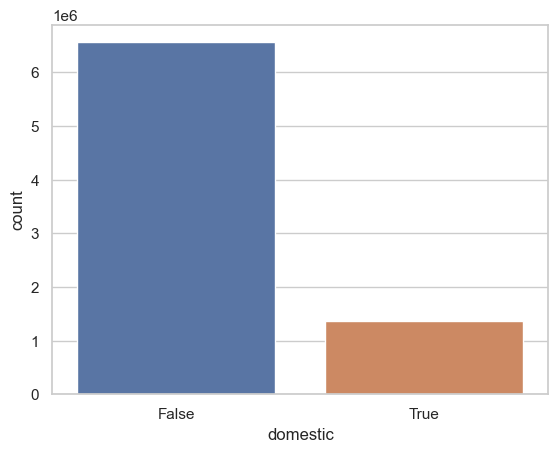

In [22]:
sns.set_theme(style="whitegrid")
sns.countplot(x=df['domestic'])

Majority of crimes aren't domestically related

## Pie Chart

### Crimes of 2016 to 2023

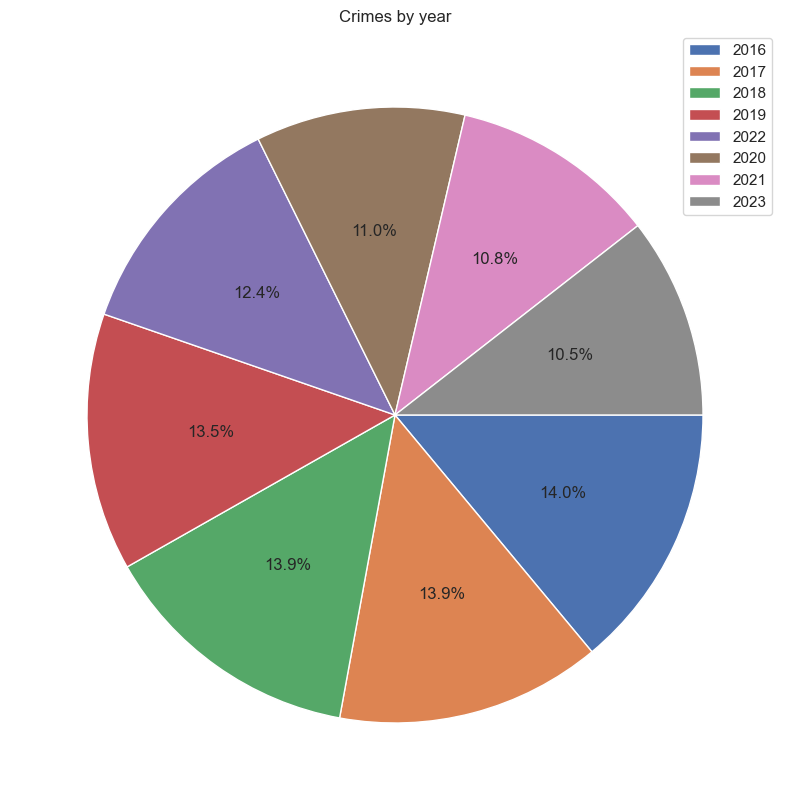

In [24]:
years = df[df['year'].isin([i for i in range (2016, 2024)])]
years = years['year'].value_counts().rename_axis('year').reset_index(name='counts')

col = years['year'][:11]
 
data = years['counts']
 
# Creating plot
fig = plt.figure(figsize =(18, 10))
plt.pie(data, counterclock = False, autopct='%1.1f%%')
plt.legend(col)
plt.title('Crimes by year')
# show plot
plt.show()

From pie chart we can see that starting from 2016 up to today (2023), crime rate has been  decreasing by constant. If in 2016 the percent of crime rate was 14.0%, today it is 10.5%. 

### Which police district does most arrests?

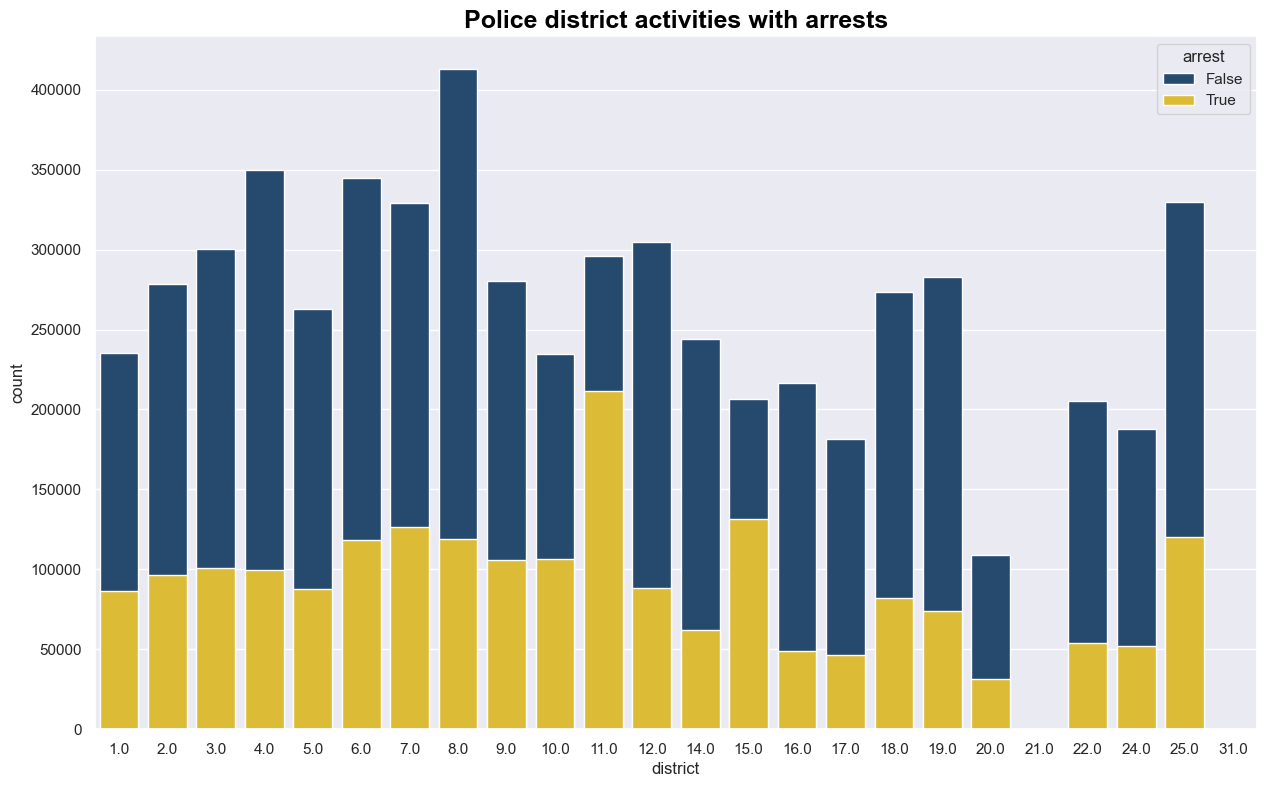

In [26]:
palette = ('#194a7a', '#f8cc1b')
ax = sns.countplot(x=df['district'],hue=df['arrest'], dodge = False, palette=palette)
ax.set_title('Police district activities with arrests', fontsize=18, 
             fontweight='bold', color='black')
sns.set(rc={'figure.figsize':(15,10)})

11th and 15th police police districts have highest arrest rate

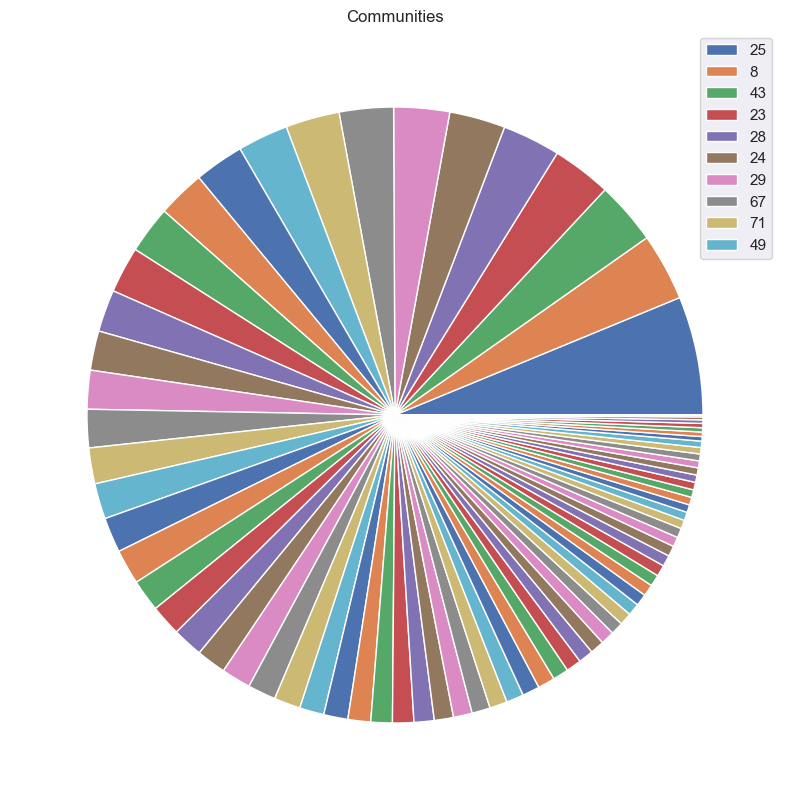

community_area
25.0    454669
8.0     258313
43.0    240712
23.0    227479
28.0    222147
         ...  
55.0     16263
12.0     13600
47.0     10930
9.0       7255
0.0         76
Name: count, Length: 78, dtype: int64

In [27]:
community = df['community_area'].value_counts().rename_axis('area').reset_index(name='counts')

col = community['area'].astype(int)
 
data = community['counts']
 
# Creating plot
fig = plt.figure(figsize =(18, 10))
plt.pie(data, counterclock = True)
plt.legend(col[:10])
plt.title('Communities')
# show plot
plt.show()

display(df['community_area'].astype(int, errors='ignore').value_counts())

Because "community_areas" has too many different labels, this pie chart is hard to read. I decided to plot countplot of only 20 most criminal communities. 

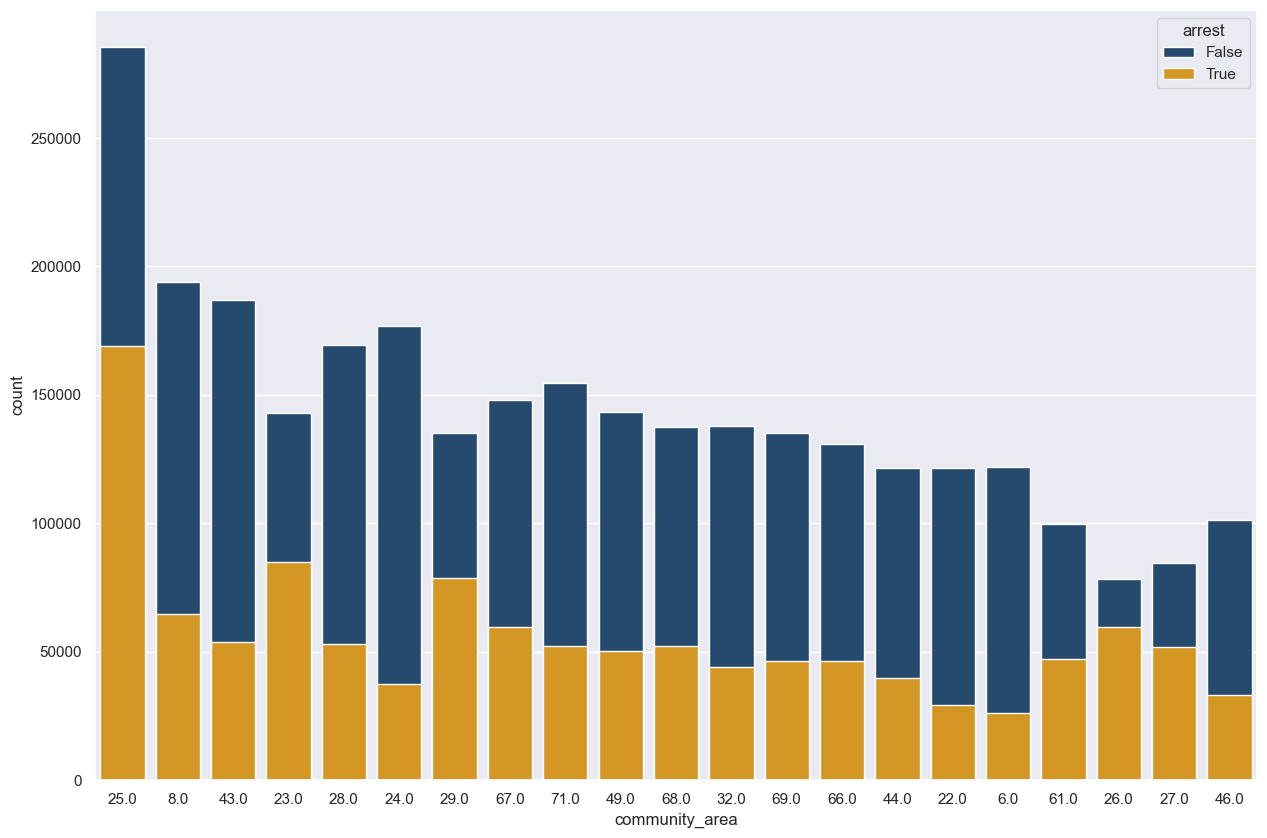

In [28]:
palette = ('#194a7a', '#f29f05')
ax = sns.countplot(x=df['community_area'], 
                   order=pd.value_counts(df['community_area']).iloc[:21].index, 
                   hue=df['arrest'], dodge=False, palette=palette)
sns.set(rc={'figure.figsize':(15,9)})

And we can see that community area 25 also known as Austin, has the highest crime rate, and therefore highest rate of arrests. 

First I thought there could be some correlation between "community_area" and "district". So I decided to check it out.

In [29]:
df.iloc[:, 2:7].corr()

,arrest,domestic,district,community_area,year
arrest,1.000000,-0.066459,-0.016812,-0.000736,-0.110777
domestic,-0.066459,1.000000,-0.054639,0.085312,0.035902
district,-0.016812,-0.054639,1.000000,-0.493904,-0.005071
community_area,-0.000736,0.085312,-0.493904,1.000000,-0.015795
year,-0.110777,0.035902,-0.005071,-0.015795,1.000000


However it shows negative correlation, -49%. Therefore I did a small research by comparing on the map, location of community area 25 and location of 11th and 15th police districts.

As I expcted high arrest rate is caused by high crime rate of a community area, and whichever police district located near by will have the highest arrest rate among other districts. 

You can see it yourself by putting these maps next to each other.

Community areas: https://en.wikipedia.org/wiki/Austin,_Chicago#/media/File:US-IL-Chicago-CA25.svg 

Police districts: https://cdn.vox-cdn.com/thumbor/N8H3RVwbDqCkJjNYMlzavhXU6Dg=/1400x0/filters:no_upscale()/cdn.vox-cdn.com/uploads/chorus_asset/file/16109277/cpdpersonnelbydistrict.jpg

<Axes: xlabel='year', ylabel='count'>

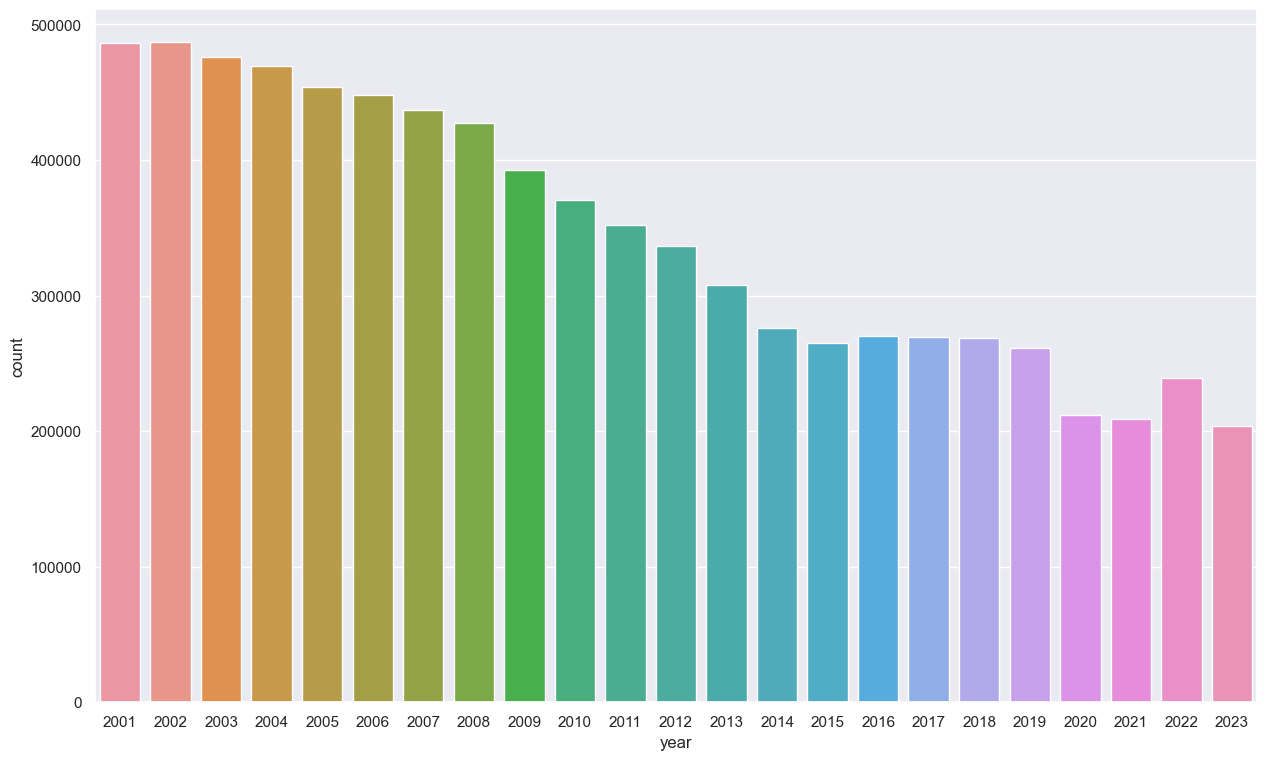

In [30]:
sns.countplot(x=df['year'])

Looks like 2002nd was the most criminal year over the time. However crime rate has been constantly reducing from 2001 up 2013. There was a spike in 2022. But at the moment, 2023 has lowest crime rate over the history of data.